<a href="https://colab.research.google.com/github/aylinayduvan1/Koc-HoldingBootcampProject/blob/main/t%C3%BCma%C5%9Famalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os 
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/spectrograms"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 10 directories and 0 images in /content/drive/MyDrive/spectrograms
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/9
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/3
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/0
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/4
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/2
There are 0 directories and 929 images in /content/drive/MyDrive/spectrograms/8
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/5
There are 0 directories and 374 images in /content/drive/MyDrive/spectrograms/6
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/7
There are 0 directories and 429 images in /content/drive/MyDrive/spectrograms/1


In [5]:
groups = len(os.listdir("/content/drive/MyDrive/spectrograms"))
groups

10

In [6]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/spectrograms")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

 
  random_image = random.sample(os.listdir(target_folder), 1)

  
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (374, 500, 4)


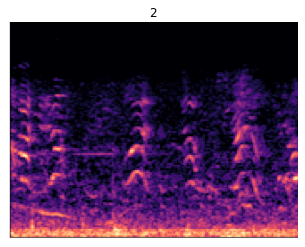

In [8]:
img = view_random_image(target_dir = "/content/drive/MyDrive/spectrograms/",
                        target_class = "2")

In [9]:
import tensorflow as tf
img.shape

(374, 500, 4)

Image shape: (374, 500, 4)
Image shape: (374, 500, 4)
Image shape: (374, 500, 4)


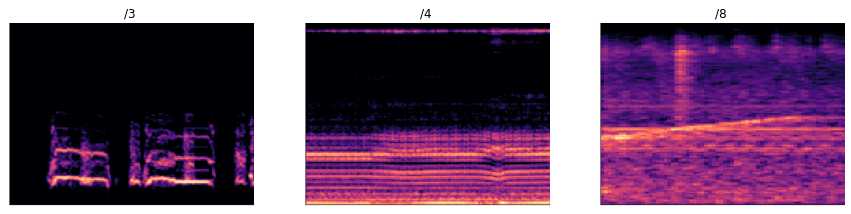

In [10]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/content/drive/MyDrive/spectrograms/", "/3")
plt.subplot(1,3,2)
pizza_image = view_random_image("/content/drive/MyDrive/spectrograms/", "/4")
plt.subplot(1,3,3)
pizza_image = view_random_image("/content/drive/MyDrive/spectrograms/", "/8")

In [11]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy ,Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import openCV
import cv2

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn.model_selection import train_test_split

In [12]:
!unzip "/content/drive/MyDrive/Downloads/UrbanSound8K.zip"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-21.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-3.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-4.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-5.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-6.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-7.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-8.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-9.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/155320-3-0-0.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-0.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-1.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-2.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-3.wav  
  inflating: UrbanSound8K/UrbanSound8K/aud

In [13]:
data_frame = pd.read_csv("/content/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

In [14]:
print(type(data_frame))
print(data_frame.shape)

<class 'pandas.core.frame.DataFrame'>
(8732, 8)


In [15]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [16]:
data_frame.shape

(8732, 8)

In [17]:
data_frame.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
data_frame.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [19]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [20]:
from pathlib import Path
import os.path

In [21]:
air_conditioners = os.listdir("/content/drive/MyDrive/spectrograms/0/")
car_horns = os.listdir("/content/drive/MyDrive/spectrograms/1/")
children_playings = os.listdir("/content/drive/MyDrive/spectrograms/2/")
dog_barks = os.listdir("/content/drive/MyDrive/spectrograms/3/")
drillings = os.listdir("/content/drive/MyDrive/spectrograms/4/")
engine_idlings =os.listdir("/content/drive/MyDrive/spectrograms/5/")
gun_shots = os.listdir("/content/drive/MyDrive/spectrograms/6/")
jackhammers = os.listdir("/content/drive/MyDrive/spectrograms/7/")
sirens = os.listdir("/content/drive/MyDrive/spectrograms/8/")
street_musics = os.listdir("/content/drive/MyDrive/spectrograms/9/")


sil_air_conditionerss = []
sil_car_hornss = []
sil_children_playingss = []
sil_dog_barkss = []
sil_drillingss = []
sil_engine_idlingss = []
sil_gun_shotss = []
sil_jackhammerss = []
sil_sirenss = []
sil_street_musicss  = []

for f_name in air_conditioners:
  try:
    path = "/content/drive/MyDrive/spectrograms/0/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/airs." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_air_conditionerss.append("/content/newfile/airs." + f_name)
    continue

In [22]:
for f_name in car_horns:
  try:
    path = "/content/drive/MyDrive/spectrograms/1/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/cars." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_car_hornss.append("/content/newfile/cars." + f_name)
    continue

In [23]:
for f_name in children_playings:
  try:
    path = "/content/drive/MyDrive/spectrograms/2/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/chil." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_children_playingss.append("/content/newfile/chil." + f_name)
    continue

In [24]:
for f_name in dog_barks:
  try:
    path = "/content/drive/MyDrive/spectrograms/3/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/dogs." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_dog_barkss.append("/content/newfile/dogs." + f_name)
    continue

In [25]:
for f_name in drillings:
  try:
    path = "/content/drive/MyDrive/spectrograms/4/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/dril." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_drillingss.append("/content/newfile/dril." + f_name)
    continue

In [26]:
for f_name in engine_idlings:
  try:
    path = "/content/drive/MyDrive/spectrograms/5/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/engi." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_engine_idlingss.append("/content/newfile/engi." + f_name)
    continue

In [27]:
for f_name in gun_shots:
  try:
    path = "/content/drive/MyDrive/spectrograms/6/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/guns." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_gun_shotss.append("/content/newfile/guns." + f_name)
    continue

In [28]:
for f_name in jackhammers:
  try:
    path = "/content/drive/MyDrive/spectrograms/7/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/jack." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_jackhammerss.append("/content/newfile/jack." + f_name)
    continue

In [29]:
for f_name in sirens:
  try:
    path = "/content/drive/MyDrive/spectrograms/8/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/sire." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_sirenss.append("/content/newfile/sire." + f_name)
    continue

In [30]:
for f_name in street_musics:
  try:
    path = "/content/drive/MyDrive/spectrograms/9/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/stre." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_street_musicss.append("/content/newfile/stre." + f_name)
    continue

In [31]:
filenames = os.listdir("/content/newfile")

labels = []
input_path = []

for i in range(len(filenames)):
  input_path.append("/content/newfile/" + filenames[i])
  file_name = filenames[i]
  label = file_name[0:4]

  if label == 'airs':
    labels.append(0)
  elif label == 'cars':
    labels.append(1)
  elif label == 'chil':
    labels.append(2)
  elif label == 'dogs':
    labels.append(3)
  elif label == 'dril':
    labels.append(4)
  elif label == 'engi':
    labels.append(5)
  elif label == 'guns':
    labels.append(6)
  elif label == 'jack':
    labels.append(7)
  elif label == 'sire':
    labels.append(8)
  else:
    labels.append(9)

In [32]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[1000  429 1000 1000 1000 1000  374 1000  929 1000]


In [33]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/newfile/engi.119449-5-0-1.png,5
1,/content/newfile/chil.60935-2-0-13.png,2
2,/content/newfile/dril.99192-4-0-55.png,4
3,/content/newfile/jack.178260-7-3-6.png,7
4,/content/newfile/chil.99500-2-0-2.png,2


In [34]:
image_width = 25
image_height = 25

In [35]:
# read image file,resize,then get gray scaled ,normalized_image
def get_normalized_image(image_file) :

  #reading the image to be normalized using imread() function
  image_read = cv2.imread(image_file)

  # resize image by specifying custom width and height
  image_resized = cv2.resize(image_read, (image_width, image_height))

  # converting the image to grayscale image
  gray_image = cv2.cvtColor(image_resized , cv2.COLOR_BGR2GRAY)

  #setting the array for resulting image after normalization
  result_image = np.zeros((image_width, image_height))

  #normalizing the given image using normalize() function
  normalized_image = cv2.normalize(gray_image, result_image, 0, 100, cv2.NORM_MINMAX)

  return normalized_image

In [36]:
normalized_image = get_normalized_image('/content/newfile/dogs.116163-3-0-0.png')

print(type(normalized_image))

print (normalized_image.shape)

<class 'numpy.ndarray'>
(25, 25)


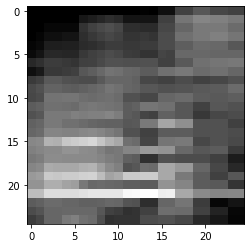

In [37]:
plt.imshow(normalized_image, cmap="gray") 

In [38]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [39]:
def wav_to_png_file(wav_file_name) :
  split_string = wav_file_name.split(".")
  png_file_name = split_string[0] + ".png"
  return png_file_name

In [40]:
png_file_name = wav_to_png_file('100263-2-0-117.wav')

print(png_file_name)

100263-2-0-117.png


In [41]:
Images = []
ClassIDs = []

for index, row in data_frame.iterrows():
  remainder = index%500
  if (index > 0 and remainder == 0) :
    print(f'index : {index}')
   
  slice_file_name = row['slice_file_name']
  classID = row['classID']
  png_file_name = wav_to_png_file(slice_file_name)

  file_path = '/content/newfile'+png_file_name

  ClassIDs.append(classID)

  Images.append(normalized_image)

index : 500
index : 1000
index : 1500
index : 2000
index : 2500
index : 3000
index : 3500
index : 4000
index : 4500
index : 5000
index : 5500
index : 6000
index : 6500
index : 7000
index : 7500
index : 8000
index : 8500


In [42]:
len(ClassIDs)

8732

In [43]:
len(Images)

8732

In [44]:
df_image2 = pd.DataFrame()
df_image2["Image"] = Images
df_image2["ClassId"] = ClassIDs
df_image2

,Image,ClassId
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",3
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
...,...,...
8727,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1
8728,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1
8729,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1
8730,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1


In [45]:
df_image2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [46]:
df_image2.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_All.csv',index=False)

In [47]:
df_Image_All = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_All.csv')

df_Image_All

,Image,ClassId
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,3
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
...,...,...
8727,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8728,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8729,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8730,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1


In [48]:
df_Image_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [49]:
X = df_Image_All.drop('ClassId',axis=1)
y = df_Image_All.loc[:,'ClassId']

In [50]:
# Print the newly created DataFrame
X.head()

,Image
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...


In [51]:
y

0       3
1       2
2       2
3       2
4       2
       ..
8727    1
8728    1
8729    1
8730    1
8731    1
Name: ClassId, Length: 8732, dtype: int64

In [52]:
X_train, X_temporary ,y_train ,y_temporary = train_test_split(X,y,train_size=0.8)
X_val ,X_test ,y_val,y_test = train_test_split(X_temporary,y_temporary,train_size=0.5)

In [53]:
print(f'Length of data set {len(X)}')
print(f'Length of train data set {len(X_train)}')
print(f'Length of validation data set {len(X_val)}')
print(f'Length of test data set {len(X_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [54]:
print(f'Length of data set {len(y)}')
print(f'Length of train data set {len(y_train)}')
print(f'Length of validation data set {len(y_val)}')
print(f'Length of test data set {len(y_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [55]:
X_train.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_train.csv',index=False)
X_val.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_val.csv',index=False)
X_test.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_test.csv',index=False)

y_train.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_train.csv',index=False)
y_val.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_val.csv',index=False)
y_test.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_test.csv',index=False)

** MODEL HAZIRLANMASI VE EĞİTİLMESİ **

In [56]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df_X_train = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_train.csv')
df_X_val = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_val.csv')
df_X_test = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_test.csv')

In [58]:
df_y_train = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_train.csv')
df_y_val = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_val.csv')
df_y_test = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_test.csv')

In [59]:
df_X_train

,Image
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
...,...
6980,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
6981,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
6982,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
6983,[[ 0 0 0 0 0 0 0 0 0 0 0 ...


In [60]:
df_y_train

,ClassId
0,5
1,3
2,3
3,4
4,5
...,...
6980,0
6981,5
6982,3
6983,4


In [61]:
image_width = 25
image_height = 25

In [62]:
X_train = df_X_train.to_numpy()
X_val = df_X_val.to_numpy()
X_test = df_X_test.to_numpy()

In [63]:
y_train = df_y_train.to_numpy()
y_val = df_y_val.to_numpy()
y_test = df_y_test.to_numpy()

In [64]:
y_train

array([[5],
       [3],
       [3],
       ...,
       [3],
       [4],
       [3]])

In [65]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_train.ndim :{X_train.ndim}')
print(f'X_train.size :{X_train.size}')

X_train.shape :(6985, 1)
X_train.ndim :2
X_train.size :6985


In [66]:
print(f'y_train.shape :{y_train.shape}')
print(f'y_train.ndim :{y_train.ndim}')
print(f'y_train.size :{y_train.size}')

y_train.shape :(6985, 1)
y_train.ndim :2
y_train.size :6985


In [67]:
def str_to_numpy_array(arr) :
  for i in range(arr.size):
    a = np.fromstring((arr[i][0]).replace('[', ' ').replace(']', ' '), dtype=int, sep=' ')
    b = a.reshape(image_width,image_height)
    arr[i][0] = b

  return arr

In [68]:
X_train = str_to_numpy_array(X_train)
X_val = str_to_numpy_array(X_val)
X_test = str_to_numpy_array(X_test)

In [ ]:
plt.imshow(X_train[500][0], cmap="gray")

In [69]:
X_train = X_train/255
X_val = X_val/255
X_test = X_val/255

In [70]:
X_train[:1]

array([[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.        , 0.        , 0.00392157, 0.        ,
                0.02352941, 0.02352941, 0.10196078, 0.10196078, 0.13333333,
                0.13333333, 0.10980392, 0.10980392, 0.10196078, 0.10196078],
               [0.        , 0.        , 0.        , 0.        , 0.        ,
                0.        , 0.03529412, 0.04705882, 0.05882353, 0.07058824,
                0.0627451 , 0.03137255, 0.03137255, 0.03137255, 0.03137255,
                0.09803922, 0.09803922, 0.18039216, 0.18039216, 0.20392157,
                0.20392157, 0.19607843, 0.19607843, 0.18431373, 0.18431373],
               [0.        , 0.        , 0.01176471, 0.01176471, 0.01176471,
                0.01176471, 0.07843137, 0.10196078, 0.11372549, 0.12156863,
                0.10980392, 0.07058824, 0.07058824, 0.06666667, 0.06666667,
          

In [71]:
print(f'X_train.shape :{X_train.shape}')
print(f'X_train.ndim :{X_train.ndim}')
print(f'X_train.size :{X_train.size}')

X_train.shape :(6985, 1)
X_train.ndim :2
X_train.size :6985


In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np

from tqdm import tqdm

In [73]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [74]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [75]:
target_dict={k: v for v, k in enumerate(np.unique(labels))}
target_dict

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [76]:
df = df[df['images']!='/content/New_File/airs.Thumbs.db']
df = df[df['images']!='/content/New_File/cars.Thumbs.db']
df = df[df['images']!='/content/New_File/chil.Thumbs.db']
df = df[df['images']!='/content/New_File/dogs.Thumbs.db']
df = df[df['images']!='/content/New_File/dril.Thumbs.db']
df = df[df['images']!='/content/New_File/engi.Thumbs.db']
df = df[df['images']!='/content/New_File/guns.Thumbs.db']
df = df[df['images']!='/content/New_File/jack.Thumbs.db']
df = df[df['images']!='/content/New_File/sire.Thumbs.db']
df = df[df['images']!='/content/New_File/stre.Thumbs.db']

df.drop(df[df.images.isin(sil_air_conditionerss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_car_hornss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_children_playingss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_dog_barkss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_drillingss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_engine_idlingss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_gun_shotss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_jackhammerss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_sirenss)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_street_musicss)].index.tolist(), inplace=True)

In [77]:
df.shape

(8732, 2)

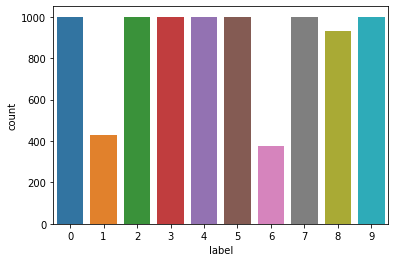

In [78]:
import seaborn as sns
sns.countplot(df['label'])

In [79]:
df['label'] = df['label'].astype('str')
df.head(10)

,images,label
0,/content/newfile/engi.119449-5-0-1.png,5
1,/content/newfile/chil.60935-2-0-13.png,2
2,/content/newfile/dril.99192-4-0-55.png,4
3,/content/newfile/jack.178260-7-3-6.png,7
4,/content/newfile/chil.99500-2-0-2.png,2
5,/content/newfile/cars.7389-1-0-2.png,1
6,/content/newfile/dril.24364-4-0-7.png,4
7,/content/newfile/engi.23219-5-1-0.png,5
8,/content/newfile/guns.34708-6-1-0.png,6
9,/content/newfile/sire.42117-8-0-1.png,8


In [80]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [81]:
# Normalizasyon adımları
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,  # görsellerin normalize edilmesi
    rotation_range = 40, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='categorical'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='categorical'
)

Found 6985 validated image filenames belonging to 10 classes.
Found 1747 validated image filenames belonging to 10 classes.


In [82]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [84]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
14/14 [==============================] - 55s 3s/step - loss: 0.3631 - accuracy: 0.8914 - val_loss: 0.3289 - val_accuracy: 0.9000
Epoch 2/10
14/14 [==============================] - 34s 2s/step - loss: 0.3264 - accuracy: 0.9000 - val_loss: 0.3259 - val_accuracy: 0.9000
Epoch 3/10
14/14 [==============================] - 35s 2s/step - loss: 0.3255 - accuracy: 0.9000 - val_loss: 0.3257 - val_accuracy: 0.9000
Epoch 4/10
14/14 [==============================] - 41s 3s/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 5/10
14/14 [==============================] - 38s 3s/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 6/10
14/14 [==============================] - 32s 2s/step - loss: 0.3252 - accuracy: 0.9000 - val_loss: 0.3254 - val_accuracy: 0.9000
Epoch 7/10
14/14 [==============================] - 33s 2s/step - loss: 0.3252 - accuracy: 0.9000 - val_loss: 0.3254 - val_accuracy: 0.9000
Epoch 8/10
14/14 [==

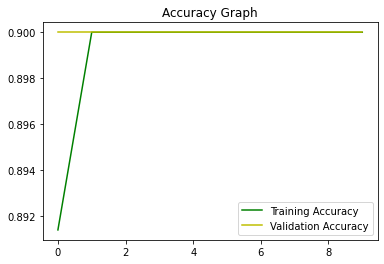

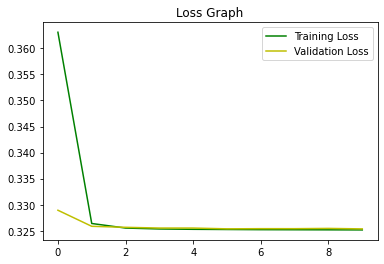

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [86]:
!pip install keras-tuner  #hyperparameter optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 48.6 MB/s 


In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [88]:
print(tf.__version__)

2.8.2


In [89]:
fashion_mnist=keras.datasets.fashion_mnist

In [90]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [91]:
train_images=train_images/255.0
test_images=test_images/255.0

In [92]:
train_images[0].shape

(28, 28)

In [93]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [94]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [95]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [96]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [97]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.8633333444595337

Best val_accuracy So Far: 0.9045000076293945
Total elapsed time: 00h 02m 55s


In [98]:
model=tuner_search.get_best_models(num_models=1)[0]

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 48)        115248    
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 48)                921648    
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,039,882
Trainable params: 1,039,882
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1888 - accuracy: 0.9289 - val_loss: 0.2719 - val_accuracy: 0.9055
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1561 - accuracy: 0.9420 - val_loss: 0.2666 - val_accuracy: 0.9067
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1259 - accuracy: 0.9521 - val_loss: 0.2857 - val_accuracy: 0.9098
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1020 - accuracy: 0.9609 - val_loss: 0.3010 - val_accuracy: 0.9097
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0837 - accuracy: 0.9687 - val_loss: 0.3404 - val_accuracy: 0.9102
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0703 - accuracy: 0.9736 - val_loss: 0.3751 - val_accuracy: 0.9112
Epoch 10/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0595 - accuracy: 0.9785 - val_loss: 0.4100 - val_accuracy

In [101]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_traing, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:",x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [102]:
from keras.layers.core.activation import activations
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28,28)))

  model.add(layers.Dense(units=hp.Int("units",
                                      min_value=32,
                                      max_value=512,
                                      step=128),
                         activation="relu"))
  model.add(layers.Dense(10, activation="softmax"))
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Choice("learning_rate",
                    values=[1e-2,1e-4])),
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])

  return model

In [103]:
tuner =RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    directory="my_dir",
    project_name="Classification")

In [104]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [105]:
tuner.search(x_train,y_train,
             epochs=10,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 04m 07s]
val_accuracy: 0.9520000020662943

Best val_accuracy So Far: 0.9653666615486145
Total elapsed time: 00h 18m 08s


In [106]:
tuner.results_summary()

Results summary
Results in my_dir/Classification
Showing 10 best trials
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.0001
Score: 0.9653666615486145
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.0001
Score: 0.9635666608810425
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.9520000020662943
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.23680000007152557
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.18539999922116598
